In [3]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as scla
import scipy as sc
import math as math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pylab as P
import matplotlib.gridspec as gridspec
%matplotlib inline

In [4]:
def plotMatrix(Ai, normtype):
    #normtype 1 normalizes whole matrix
    #normtype 2 normalizes rows of matrix
    
    N, M = Ai.shape
  
    if(normtype == 1):
        norm = np.max(abs(Ai))
        A = Ai/(norm*2)
    elif(normtype == 2):
        A = Ai*1.
        for i in range(0, N, 1):
            norm = np.max(abs(Ai[i,]))
            A[i,] = Ai[i,]/(norm*2)
    
    t = np.arange(1, M+1, 1)
    for i in range(0, N, 1):
        base = A[i,]*0.
        base.fill(N-i)
        plt.fill_between(t, base, A[i,]+base)
    plt.ylim(0,N+1)
    plt.axis('off')

In [5]:
N = 20

m17 = np.zeros(7); m17.fill(20)
m820 = np.zeros(20-8+1); m820.fill(10)
m2135 = np.zeros(35-21+1); m2135.fill(50)
m3650 = np.zeros(50-36+1); m3650.fill(35)
mt = np.concatenate((m17, m820, m2135, m3650))
z = np.arange(100, 5100, 100)
alpha = 0.5e-3

A1 = np.zeros((N,len(mt)))
for j in range(0, A1.shape[0]):
    for k in range(0, A1.shape[1]):
        A1[j][k] = np.exp((-1*alpha*z[k]*(j+1)**2)/mt[k])

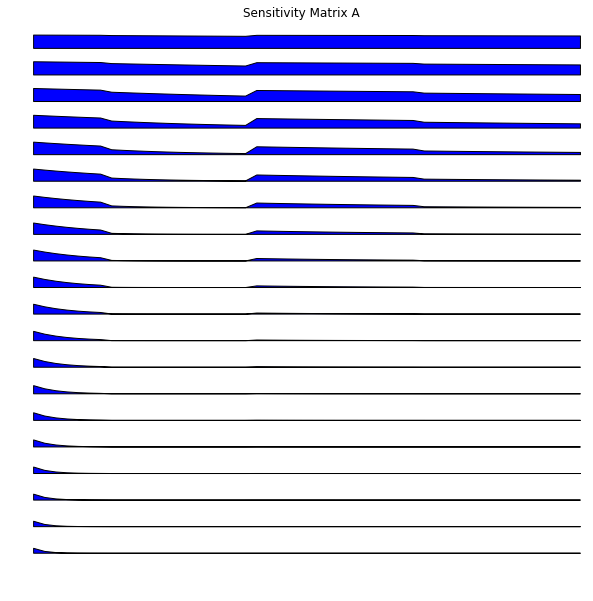

In [6]:
plt.figure(figsize=(10,10))
plotMatrix(A1, 1)
plt.title('Sensitivity Matrix A')
plt.savefig('A4Q2a.pdf')

In [7]:
def regSolve(Cdi, A, mu, H, mh, d):
    # Cdi: Square Matrix
    # A: Matrix
    # mu: Scalar
    # H: Square Matrix
    # mh: Vector, same width as A
    # d: Vector, same height as A
    
    aci = np.dot(A.T,Cdi)
    D1 = np.dot(aci, A) # AT * Cdi * A
    
    D2 = mu*np.dot(H.T, H) # mu * HT * H
    D = D1 + D2
    Di = la.inv(D) # Term 1
    
    amh = np.dot(A, mh)
    damh = d-amh
    F = np.dot(aci, d)
    DF = np.dot(Di,F)
    m = mh+DF
    dam = np.dot(A, m) - d
    chicken = np.dot(np.dot(dam.T,Cdi),dam)
    return m, chicken

#test example
At = np.array([[2, 4, 3], [1, 1, 1]])
dt = np.array([13, 4])
Cdit = np.eye(2)
Ht = np.array([[-1, 1, 0], [0, -1, 1], [0, 0, 0]])
mut = 100
mht = np.zeros(3)

def plotModel(mod, thick, vlabel):
    depth = np.linspace(0, len(mod)*thick, 10000)
    m = depth*0.
    for i in range(0, len(mod), 1):
        m[depth>=i*thick] = mod[i]
    plt.plot(m, depth, label=vlabel)
    plt.ylim(thick*len(mod), 0)
    plt.xlim(0., 100.)

In [8]:
dt = np.dot(A1, mt)
Cdi1 = np.zeros((N,N))
d1 = dt*0.
for j in range(0, N):
    nstd = 0.0001*dt[j]
    d1[j] = dt[j] + np.random.normal(0, nstd)
    Cdi1[j][j] = 1./(nstd**2)
    
Cdi2 = np.zeros((N,N))
d2 = dt*0.
for j in range(0, N):
    nstd = 0.01*dt[j]
    d2[j] = dt[j] + np.random.normal(0, nstd)
    Cdi2[j][j] = 1./(nstd**2)
    
Cdi3 = np.zeros((N,N))
d3 = dt*0.
for j in range(0, N):
    nstd = 0.1*dt[j]
    d3[j] = dt[j] + np.random.normal(0, nstd)
    Cdi3[j][j] = 1./(nstd**2)

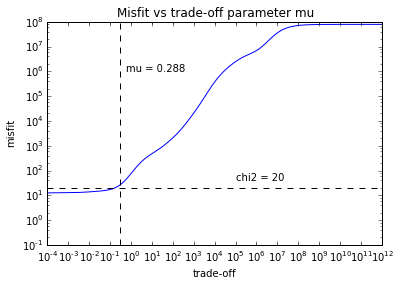

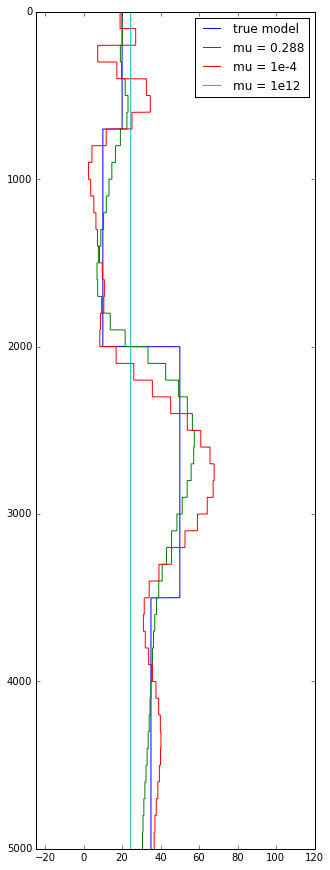

In [9]:
#flattest Solution
Hf = np.zeros((50,50))
for i in range(0, 50-1):
    Hf[i][i] =  -1.
    Hf[i][i+1] = 1.

mhat = np.zeros(50)
mu = np.logspace(-4,12,1000)

chi2f = np.zeros(1000)
for i, u in enumerate(mu):
    chi2f[i] = regSolve(Cdi1, A1, u, Hf, mhat, d1)[1]
plt.loglog(mu, chi2f)

plt.loglog([0.0001, 1e12],[20,20], 'k--')
plt.loglog([0.28804442, 0.28804442], [0.1, 1e8], 'k--')
plt.annotate('mu = 0.288', xy=(0.6, 1e6))
plt.annotate('chi2 = 20', xy=(1e5, 40))
plt.title('Misfit vs trade-off parameter mu')
plt.ylabel('misfit')
plt.xlabel('trade-off')
plt.savefig('A4Q2b.pdf')

mf = regSolve(Cdi1, A1, 0.28804442, Hf, mhat, d1)[0]
plt.figure(figsize=(5,15))
plotModel(mt, 100, 'true model')
plotModel(mf, 100, 'mu = 0.288')
plotModel(regSolve(Cdi1, A1, 1e-4, Hf, mhat, d1)[0], 100, 'mu = 1e-4')
plotModel(regSolve(Cdi1, A1, 1e12, Hf, mhat, d1)[0], 100, 'mu = 1e12')
plt.xlim(-25, 120)
#plotModel(ms, 100, 'smallest')
plt.legend()
plt.savefig('A4q2b.pdf')

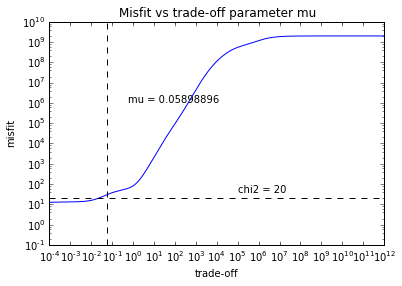

In [10]:
#smallest model
Hs = np.eye(50)
mhat = np.zeros(50)
mus = np.logspace(-4,12,1000)
chi2 = np.zeros(1000)

for i, u in enumerate(mus):
    chi2[i] = regSolve(Cdi1, A1, u, Hs, mhat, d1)[1]
plt.loglog(mus, chi2)
plt.loglog([0.0001, 1e12],[20,20], 'k--')
plt.loglog([0.05898896, 0.05898896], [0.1, 1e10], 'k--')
plt.annotate('mu = 0.05898896', xy=(0.6, 1e6))
plt.annotate('chi2 = 20', xy=(1e5, 40))
plt.title('Misfit vs trade-off parameter mu')
plt.ylabel('misfit')
plt.xlabel('trade-off')

ms = regSolve(Cdi1, A1, 0.05898896, Hs, mhat, d1)[0]

[ 1.57107239  1.63009236  1.69132952  1.75486715  1.82079168  1.88919278
  1.96016347]
[ 19.01540245  19.26144185  19.52332802  19.80209352  20.09883347
  20.41471001  20.75095449]


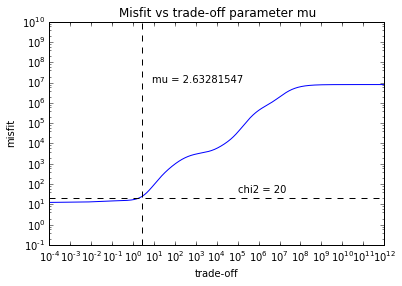

In [11]:
#smoothest model
Hsm = np.zeros((50,50))
for i in range(0, 50-2):
    Hsm[i][i] = -1.
    Hsm[i][i+1] = 2.
    Hsm[i][i+2] = -1.
    
mhat = np.zeros(50)
musm = np.logspace(-4,12,1000)
chi2 = np.zeros(1000)

for i, u in enumerate(musm):
    chi2[i] = regSolve(Cdi1, A1, u, Hsm, mhat, d1)[1]
plt.loglog(musm, chi2)
plt.loglog([0.0001, 1e12],[20,20], 'k--')
plt.loglog([2.63281547, 2.63281547], [0.1, 1e10], 'k--')

print musm[abs(chi2-20.) < 1.]
print chi2[abs(chi2-20.) < 1.]

plt.annotate('mu = 2.63281547', xy=(8, 1e7))
plt.annotate('chi2 = 20', xy=(1e5, 40))
plt.title('Misfit vs trade-off parameter mu')
plt.ylabel('misfit')
plt.xlabel('trade-off')

msm = regSolve(Cdi1, A1, 2.63281547, Hsm, mhat, d1)[0]

In [12]:
mf2 = regSolve(Cdi2, A1, 0.28804442, Hf, mhat, d2)[0]
mf3 = regSolve(Cdi3, A1, 0.28804442, Hf, mhat, d3)[0]
ms2 = regSolve(Cdi2, A1, 0.05898896, Hs, mhat, d2)[0]
ms3 = regSolve(Cdi3, A1, 0.05898896, Hs, mhat, d3)[0]
msm2 = regSolve(Cdi2, A1, 2.63281547, Hsm, mhat, d2)[0]
msm3 = regSolve(Cdi3, A1, 2.63281547, Hsm, mhat, d3)[0]

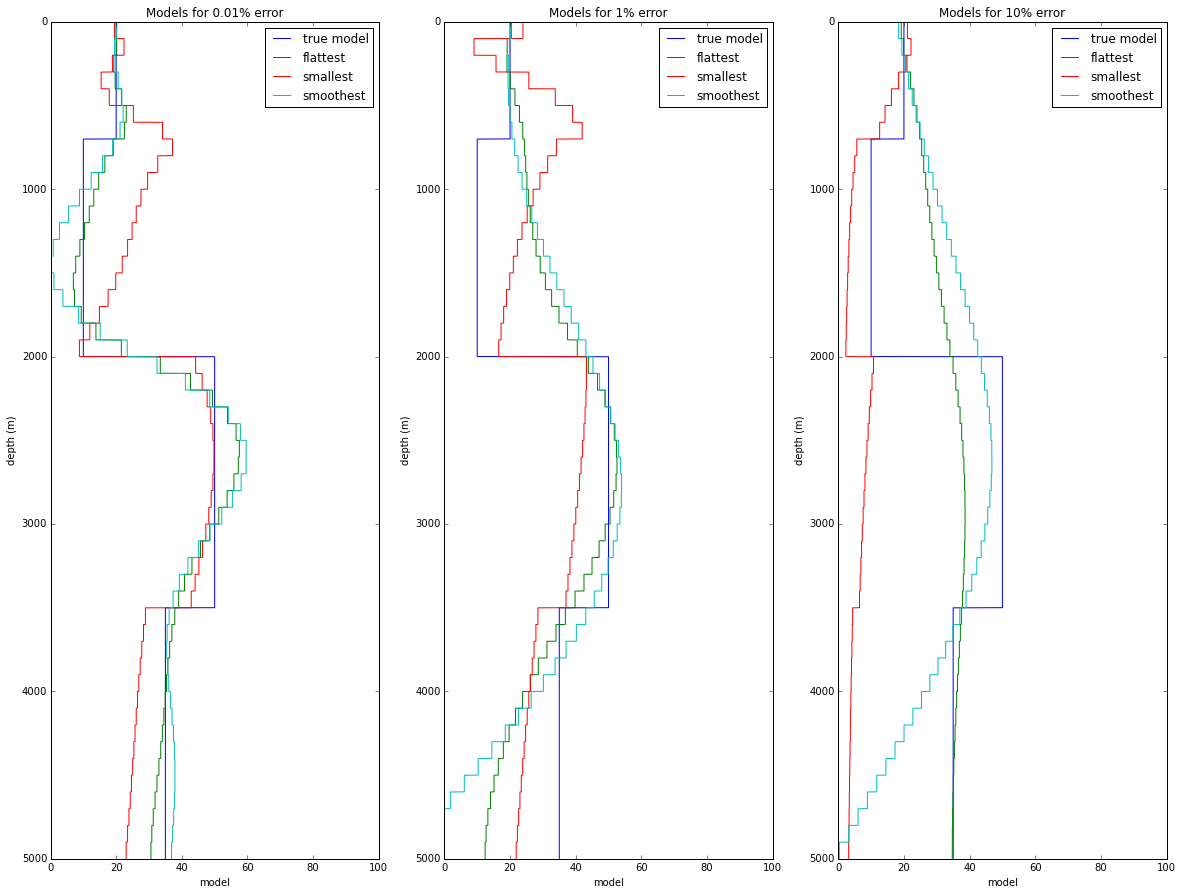

In [13]:
plt.figure(figsize=(20,15))

plt.subplot(131)
plotModel(mt, 100, 'true model')
plotModel(mf, 100, 'flattest')
plotModel(ms, 100, 'smallest')
plotModel(msm, 100, 'smoothest')
plt.title('Models for 0.01% error')
plt.ylabel('depth (m)')
plt.xlabel('model')
plt.legend()

plt.subplot(132)
plotModel(mt, 100, 'true model')
plotModel(mf2, 100, 'flattest')
plotModel(ms2, 100, 'smallest')
plotModel(msm2, 100, 'smoothest')
plt.title('Models for 1% error')
plt.ylabel('depth (m)')
plt.xlabel('model')
plt.legend()

plt.subplot(133)
plotModel(mt, 100, 'true model')
plotModel(mf3, 100, 'flattest')
plotModel(ms3, 100, 'smallest')
plotModel(msm3, 100, 'smoothest')
plt.title('Models for 10% error')
plt.ylabel('depth (m)')
plt.xlabel('model')
plt.legend()

plt.savefig('A4q2c.pdf')

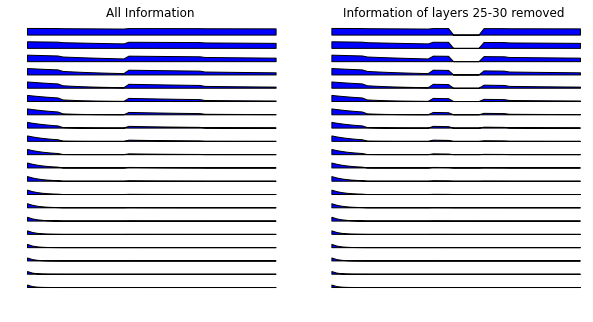

In [14]:
Ad = A1*1.
Ad[:, 24:30] = np.zeros((20,6))
plt.figure(figsize=(10,5))
plt.subplot(121)
plotMatrix(A1, 1)
plt.title('All Information')
plt.subplot(122)
plotMatrix(Ad, 1)
plt.title('Information of layers 25-30 removed')
plt.savefig('A4q2d.pdf')

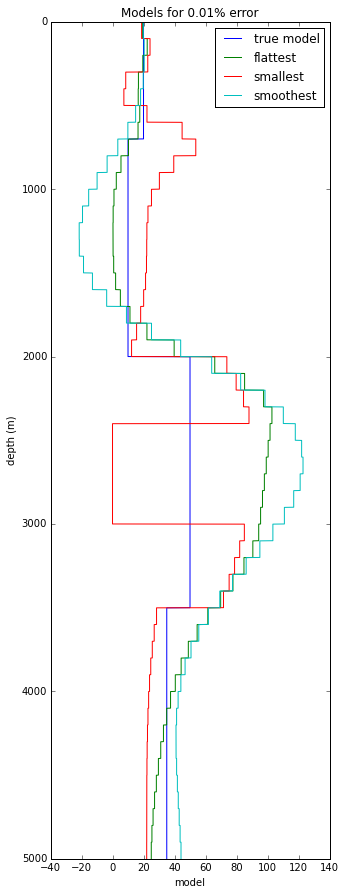

In [15]:
mfd = regSolve(Cdi1, Ad, 0.28804442, Hf, mhat, d1)[0]
msd = regSolve(Cdi1, Ad, 0.05898896, Hs, mhat, d1)[0]
msmd = regSolve(Cdi1, Ad, 2.63281547, Hsm, mhat, d1)[0]

plt.figure(figsize=(5,15))
plotModel(mt, 100, 'true model')
plotModel(mfd, 100, 'flattest')
plotModel(msd, 100, 'smallest')
plotModel(msmd, 100, 'smoothest')
plt.title('Models for 0.01% error')
plt.ylabel('depth (m)')
plt.xlabel('model')
plt.xlim(-40, 140)
plt.legend()
plt.savefig('A4q2dmodel.pdf')

In [20]:
#SVD solver.
def getSvd(A):
    N = A.shape[0]
    M = A.shape[1]
    Uc, wc, Vc = la.svd(A, full_matrices=False)
    Wc = np.zeros((M,M))
    for i in range(0,len(wc),1):
        Wc[i][i] = wc[i]
    W = np.diag(wc)
    if(N>=M): 
        return Uc, Wc, Vc.T
    else: 
        return Uc, W, Vc.T

def genInv(U, W, V, rid):
    Wi = W*0.
    for i in range(0, W.shape[0]-rid,1):
        Wi[i][i] = 1/W[i][i]
    return np.dot(V,np.dot(Wi, U.T)), Wi

def svdSolve(d, Cd, A, rid):
    S = la.cholesky(la.inv(Cd))
    U,W,V = getSvd(np.dot(S,A))
    k = np.zeros(W.shape[0])
    for i in range(0, W.shape[0]):
        k[i] = W[i][i]
    Ag, Wi = genInv(U,W,V, rid)
    m = np.dot(Ag, np.dot(S,d))
    dam = np.dot(A, m) - d
    chicken = np.dot(np.dot(dam.T,Cdi1),dam)
    return m, k, chicken

In [21]:
Cd = Cdi1*1.
for i in range(0, Cdi1.shape[0]):
    Cd[i][i] = 1./Cdi1[i][i]

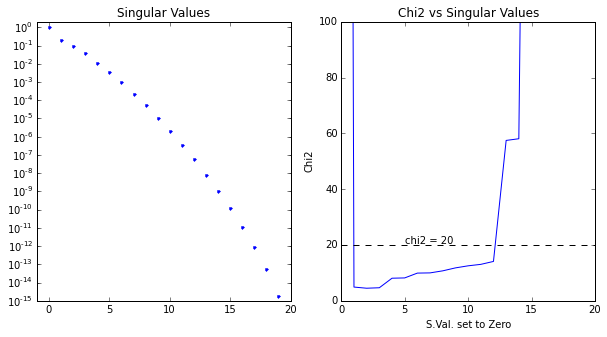

In [22]:
m, sval, chi2 = svdSolve(d1, Cd, A1, 0)
svalx = np.arange(0, len(sval), 1)
sval = sval/np.max(sval)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.semilogy(svalx, sval, '.')
plt.title('Singular Values')
plt.ylim(1e-15, 2)
plt.xlim(-1, 20)

chilist = np.zeros(Cd.shape[0])
chix = np.arange(0,len(chilist))

for i in range(0, Cd.shape[0]):
    chilist[i] = svdSolve(d1, Cd, A1, i)[2]

plt.subplot(122)
plt.plot(chix, chilist)
plt.plot([0, 20], [20, 20], 'k--')
plt.annotate('chi2 = 20', xy=(5, 20.5))
plt.ylim(0, 100)
plt.xlabel('S.Val. set to Zero')
plt.ylabel('Chi2')
plt.title('Chi2 vs Singular Values')

plt.savefig('A4q2c2.pdf')

14.107695311
57.4803975736


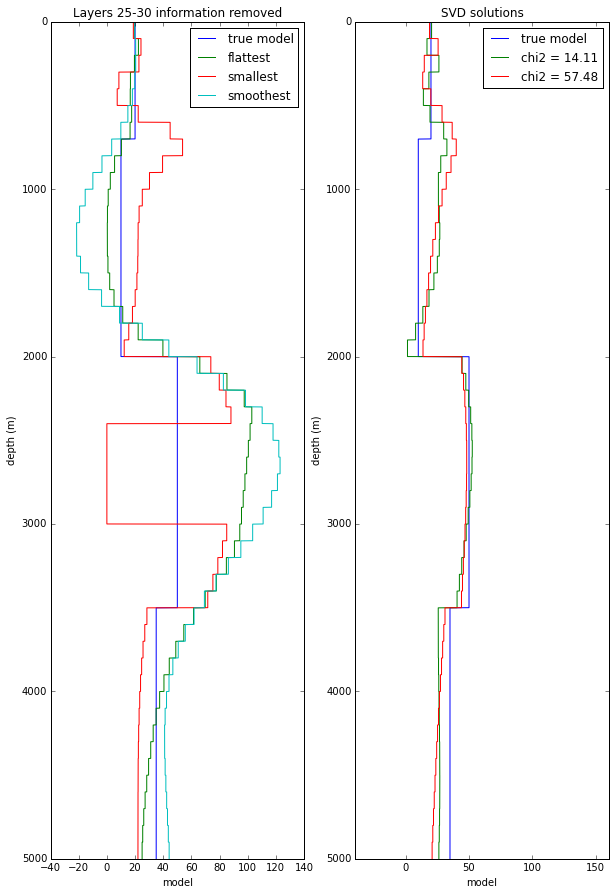

In [19]:
m12, sval, chi212 = svdSolve(d1, Cd, A1, 12)
m13, sval, chi213 = svdSolve(d1, Cd, A1, 13)
print chi212
print chi213

lab12 = 'chi2 = ' + "%.2f" % chi212
lab13 = 'chi2 = ' + "%.2f" % chi213

plt.figure(figsize=(10,15))
plt.subplot(121)
plotModel(mt, 100, 'true model')
plotModel(mfd, 100, 'flattest')
plotModel(msd, 100, 'smallest')
plotModel(msmd, 100, 'smoothest')
plt.title('Layers 25-30 information removed')
plt.ylabel('depth (m)')
plt.xlabel('model')
plt.xlim(-40, 140)
plt.legend()

plt.subplot(122)
plotModel(mt, 100, 'true model')
plotModel(m12, 100, lab12)
plotModel(m13, 100, lab13)
plt.title('SVD solutions')
plt.ylabel('depth (m)')
plt.xlabel('model')
plt.xlim(-40, 160)
plt.legend()
plt.savefig('A4q2dmodel.pdf')